In [4]:
from logging import WARNING, INFO
from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
run_name = 'graph_8_2'
seed = '2001'
save_path = 'plots/'
#file_path = 'outputs/no_pretrain/' + 'seed_' + seed + '/' + run_name #NEED TO READ ALL FILES
file_path = run_name
num_agents = 10

In [6]:
tplgys = []
raw_tplgys = []
acc_distr = []
for i in range(5):
    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_pool.out', mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    tplgys.append(lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_raw.out', mode = 'r', encoding = 'utf-8-sig')
    r_lines = file.readlines()
    raw_tplgys.append(r_lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_acc_distr.out', mode = 'r', encoding = 'utf-8-sig')
    a_lines = file.readlines()
    acc_distr.append(a_lines)
    file.close()

In [7]:
tplgy_ID = []
loss = []
acc = []

for tplgy in tplgys:
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for line in tplgy:
        tmp1.append(int(line.split(' ')[1]))
        tmp2.append(float(line.split(' ')[-3]))
        tmp3.append(float(line.split(' ')[-1]))
    tplgy_ID.append(tmp1)
    loss.append(tmp2)
    acc.append(tmp3)
print(tplgy_ID)
print(loss)
print(acc)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[447.5307602882385, 89.89356869459152, 87.99501597881317, 89.2293131351471, 504.14598751068115, 87.70624947547913, 87.47178274393082, 91.45245063304901, 86.60510039329529, 415.2596769332886], [151.37492418289185, 106.33802950382233, 105.79839026927948, 106.00652730464935, 152.15689051151276, 104.07734096050262, 104.05568432807922, 104.13906574249268, 86.7063376903534, 414.593195438385], [110.04945063591003, 109.87466382980347, 109.90943777561188, 109.92802155017853, 109.96334326267242, 110.35735082626343, 110.18887221813202, 109.87029254436493, 88.36264610290527, 396.5039677619934], [116.92869329452515, 116.22069692611694, 116.70265424251556, 116.55921602249146, 116.98574030399323, 116.58434295654297, 116.52338564395905, 116.68286514282227, 87.84692686796188, 403.7835178375244], [118.02809691429138, 117.99745976924896, 117.848

In [8]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
print(exec_times)

[64.30263986587525, 87.7588364402453, 111.28454292615255, 136.33054486115773, 149.66475906769435]


In [9]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], acc[0], '.')
# axs[0, 0].set_ylim(0, 0.8)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], acc[1], '.')
# axs[0, 1].set_ylim(0, 0.8)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], acc[2], '.')
# axs[1, 0].set_ylim(0, 0.8)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], acc[3], '.')
# axs[1, 1].set_ylim(0, 0.8)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], acc[4], '.')
# axs[2, 0].set_ylim(0, 0.8)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Acc')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_acc.pdf')

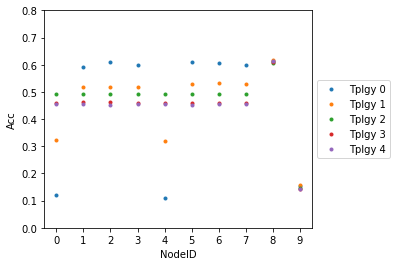

In [10]:
plt.plot(tplgy_ID[0], acc[0], '.')
plt.plot(tplgy_ID[1], acc[1], '.')
plt.plot(tplgy_ID[2], acc[2], '.')
plt.plot(tplgy_ID[3], acc[3], '.')
plt.plot(tplgy_ID[4], acc[4], '.')
plt.ylim(0, 0.8)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Acc')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(save_path+run_name+'_summarized_acc.pdf')

In [11]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], loss[0], '.')
# axs[0, 0].set_ylim(50, 200)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], loss[1], '.')
# axs[0, 1].set_ylim(50, 200)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], loss[2], '.')
# axs[1, 0].set_ylim(50, 200)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], loss[3], '.')
# axs[1, 1].set_ylim(50, 200)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], loss[4], '.')
# axs[2, 0].set_ylim(50, 200)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Loss')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_loss.pdf')

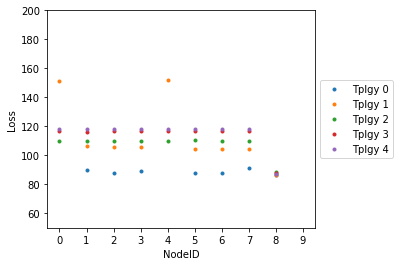

In [12]:
plt.plot(tplgy_ID[0], loss[0], '.')
plt.plot(tplgy_ID[1], loss[1], '.')
plt.plot(tplgy_ID[2], loss[2], '.')
plt.plot(tplgy_ID[3], loss[3], '.')
plt.plot(tplgy_ID[4], loss[4], '.')
x = np.arange(0, num_agents, 1)
plt.xticks(x)
plt.ylim(50, 200)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Loss')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(save_path+run_name+'_summarized_loss.pdf')

In [13]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 256
for tplgy in raw_tplgys:
    tmp = tplgy[1].split()
    tmp_loss = []
    for i in range(1,num_rounds+1):
        tmp_loss.append((float(tmp[2*i][:-1])))
    loss_per_tplgy.append(tmp_loss)

In [14]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 256
for loss_tplgy in loss_per_tplgy:
    loss_per_agent = []
    for i in range(num_agents):
        tmp_loss = []
        for j in range(i+1, num_rounds, num_agents):
            tmp_loss.append((loss_tplgy[j]))
        loss_per_agent.append(tmp_loss)
    loss_per_tplgy_by_agent.append(loss_per_agent)

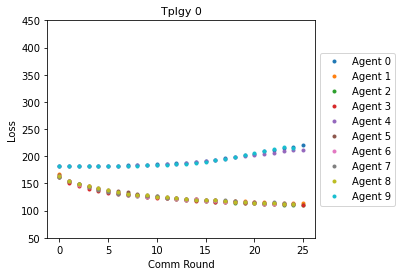

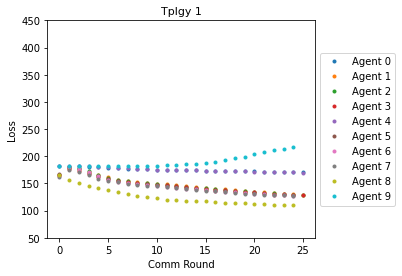

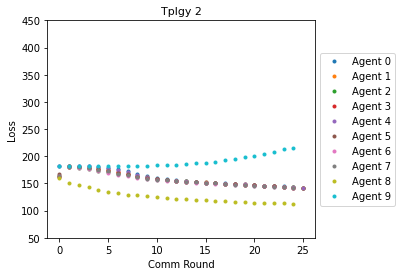

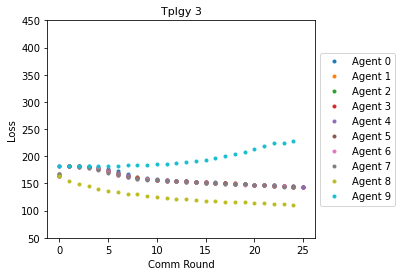

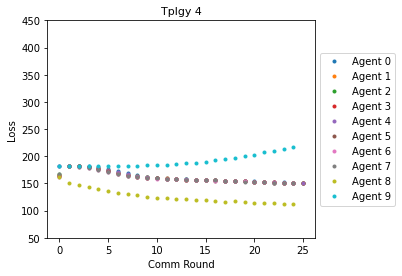

In [15]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT

for i in range(5):
    plt.plot(loss_per_tplgy_by_agent[i][0], '.')
    plt.plot(loss_per_tplgy_by_agent[i][1], '.')
    plt.plot(loss_per_tplgy_by_agent[i][2], '.')
    plt.plot(loss_per_tplgy_by_agent[i][3], '.')
    plt.plot(loss_per_tplgy_by_agent[i][4], '.')
    plt.plot(loss_per_tplgy_by_agent[i][5], '.')
    plt.plot(loss_per_tplgy_by_agent[i][6], '.')
    plt.plot(loss_per_tplgy_by_agent[i][7], '.')
    plt.plot(loss_per_tplgy_by_agent[i][8], '.')
    plt.plot(loss_per_tplgy_by_agent[i][9], '.')
    plt.ylim(50, 450)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title("Tplgy "+str(i), fontsize=11)
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9'], loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(save_path+str(i)+'_'+run_name+'_raw_summarized_loss.pdf')
    plt.show()


In [16]:
'''Visualize acc average per pool and comm round'''

acc1 = []
for accuracies in acc_distr:
    acc2 = []
    for acc in accuracies:
        res = []
        for idx in acc.split(' '):
            f_idx = float(idx)
            if f_idx == 1.0:
                f_idx = 0.0
            res.append(f_idx)
        #res = [float(idx) for idx in acc.split(' ')]
        if res == 1.0:
            res = 0.0
        acc2.append(np.average(res))
    acc1.append(acc2)

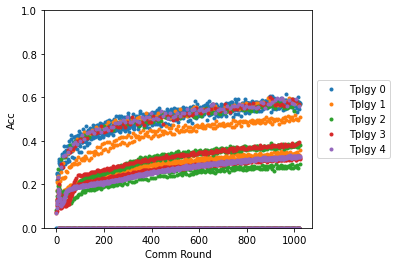

In [17]:
plt.plot(acc1[0], '.')
plt.plot(acc1[1], '.')
plt.plot(acc1[2], '.')
plt.plot(acc1[3], '.')
plt.plot(acc1[4], '.')
#x = np.arange(0, num_rounds, 1)
#plt.xticks(x)
plt.ylim(0.0, 1.0)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('Comm Round')
plt.ylabel('Acc')

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(save_path+run_name+'_summ_distr_acc.pdf')

In [18]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
# for i in range(5):
#     fig, axs = plt.subplots(5, 2)
#     axs[0, 0].plot(loss_per_tplgy_by_agent[i][0], '.')
#     axs[0, 0].set_ylim(50, 450)
#     axs[0, 0].set_title("Agent 0", fontsize=9)
#     axs[0, 1].plot(loss_per_tplgy_by_agent[i][1], '.')
#     axs[0, 1].set_ylim(50, 450)
#     axs[0, 1].set_title("Agent 1", fontsize=9)
#     axs[1, 0].plot(loss_per_tplgy_by_agent[i][2], '.')
#     axs[1, 0].set_ylim(50, 450)
#     axs[1, 0].set_title("Agent 2", fontsize=9)
#     axs[1, 1].plot(loss_per_tplgy_by_agent[i][3], '.')
#     axs[1, 1].set_ylim(50, 450)
#     axs[1, 1].set_title("Agent 3", fontsize=9)
#     axs[2, 0].plot(loss_per_tplgy_by_agent[i][4], '.')
#     axs[2, 0].set_ylim(50, 450)
#     axs[2, 0].set_title("Agent 4", fontsize=9)
#     axs[2, 1].plot(loss_per_tplgy_by_agent[i][5], '.')
#     axs[2, 1].set_ylim(50, 450)
#     axs[2, 1].set_title("Agent 5", fontsize=9)
#     axs[3, 0].plot(loss_per_tplgy_by_agent[i][6], '.')
#     axs[3, 0].set_ylim(50, 450)
#     axs[3, 0].set_title("Agent 6", fontsize=9)
#     axs[3, 1].plot(loss_per_tplgy_by_agent[i][7], '.')
#     axs[3, 1].set_ylim(50, 450)
#     axs[3, 1].set_title("Agent 7", fontsize=9)
#     axs[4, 0].plot(loss_per_tplgy_by_agent[i][8], '.')
#     axs[4, 0].set_ylim(50, 450)
#     axs[4, 0].set_title("Agent 8", fontsize=9)
#     axs[4, 1].plot(loss_per_tplgy_by_agent[i][9], '.')
#     axs[4, 1].set_ylim(50, 450)
#     axs[4, 1].set_title("Agent 9", fontsize=9)
# 
#     for ax in axs.flat:
#         ax.set(xlabel='Comm round', ylabel='Loss')
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
#     plt.savefig(save_path+run_name+'_evol_loss_tplgy' + str(i) + '.pdf')

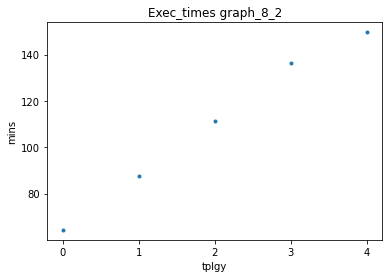

In [19]:
'''Visualize Exec times per topology'''

plt.plot(range(5), exec_times, '.')
x = np.arange(0, 5, 1)
plt.xticks(x)
plt.xlabel("tplgy")
plt.ylabel("mins")
plt.title("Exec_times " + run_name)
plt.savefig(save_path+run_name+'_exec_times.pdf')
plt.show()

In [20]:
# plt.plot(tplgy_ID[0], acc[0], 'o')
# plt.ylim(0.1, 0.6)
# plt.title("ACC per tplgy " + run_name)
# plt.show()

In [21]:
# plt.plot(tplgy_ID[0], loss[0], 'o')
# plt.ylim(100, 300)
# plt.title("Loss per tplgy " + run_name)
# plt.show()